In [1]:
from run_kinfit import run_kinfit
from draw_funcs import draw_1d_hist, draw_1d_hists, vertices_plot2, draw_2d_hist
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/00


In [2]:
input_path = "/var/kinfit/data/tr_ph_run014244.root"
output_path = "kinfit_kskpi_run014244.root"

In [3]:
run_kinfit(input_path, output_path=output_path, mfield=1.3)

Output(layout=Layout(border='1px solid black'))

(int) 0
(TFile &) Name: /var/kinfit/data/tr_ph_run014244.root Title: 
(TrPh &) @0x7fb344e2e000


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/KsKlpi0/TrPh_C.so


In [4]:
fl = TFile.Open(output_path, 'read')

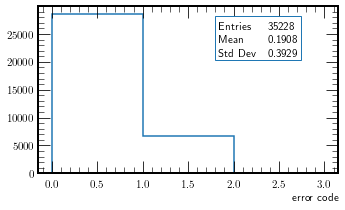

In [5]:
fl.kf_data.Draw("kf_err>>kf_err_ksklpi0(3,0,3)", "", "goff")
draw_1d_hist("kf_err_ksklpi0", xlabel='error code')
plt.savefig('kf_err_ksklpi0.eps')

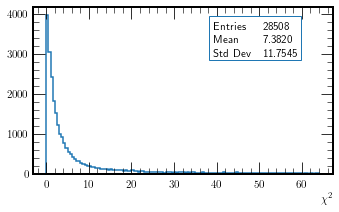

In [6]:
fl.kf_data.Draw("kf_chi2>>kf_chi2_ksklpi0(128,0,64)", "kf_err==0", "goff")
draw_1d_hist("kf_chi2_ksklpi0", xlabel=r'$\chi^2$')
plt.savefig('kf_chi2_ksklpi0.eps')

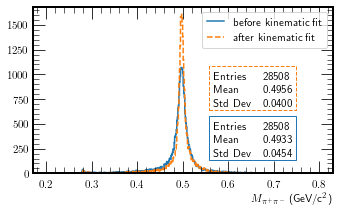

In [7]:
fl.kf_data.Draw("in_mks>>in_mks(512,0.2,0.8)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mks>>kf_mks(512,0.2,0.8)", "kf_err==0", "goff")
draw_1d_hists([('in_mks', 'before kinematic fit'), ('kf_mks', 'after kinematic fit')], xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)')

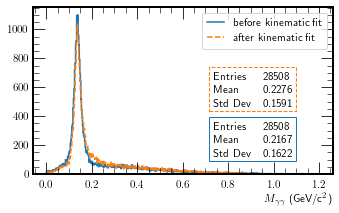

In [8]:
fl.kf_data.Draw("in_mgg>>in_mgg(512,0,1.2)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mgg>>kf_mgg(512,0,1.2)", "kf_err==0", "goff")
draw_1d_hists([('in_mgg', 'before kinematic fit'), ('kf_mgg', 'after kinematic fit')], xlabel=r'$M_{\gamma\gamma}$ (GeV/c$^2$)')

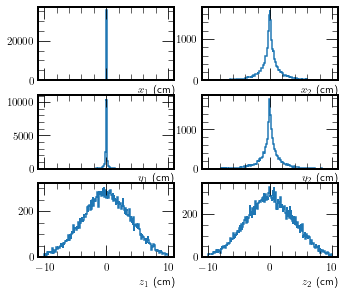

In [9]:
fl.kf_data.Draw("kf_vtx0[0]>>kf_vtx0_x(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx0[1]>>kf_vtx0_y(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx0[2]>>kf_vtx0_z(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[0]>>kf_vtx1_x(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[1]>>kf_vtx1_y(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[2]>>kf_vtx1_z(256, -10, 10)", "", "goff")
vertices_plot2([['kf_vtx0_x', 'kf_vtx1_x'], 
               ['kf_vtx0_y', 'kf_vtx1_y'],
               ['kf_vtx0_z', 'kf_vtx1_z']],
                info_coords=(0.6, 0.6))

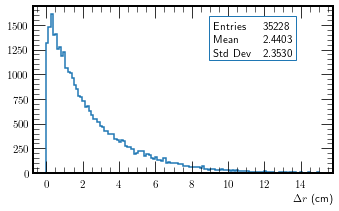

In [10]:
fl.kf_data.Draw("kf_vtx_dr>>kf_vtx_dr(128, 0, 15)", "", "goff")
draw_1d_hist("kf_vtx_dr", xlabel=r'$\Delta r$ (cm)')
plt.savefig('kf_vtx_dr_ksklpi0.eps')

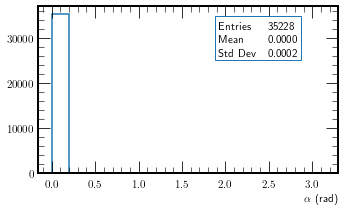

In [11]:
fl.kf_data.Draw("kf_dvtx_2pi_angle>>kf_angle(16, 0, 3.14159", "", "goff")
draw_1d_hist("kf_angle", xlabel=r'$\alpha$ (rad)')
plt.savefig('kf_ks_prod_angle_ksklpi0.eps')

In [12]:
fl.Close()